# 1. Definisi Data 

| *Kolom*            | *Deskripsi*                                                                                   | *Nilai yang Mungkin*                                                                                                                                                     | *Tipe Data*     |
|----------------------|-------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------|
| *id*               | Identifikasi unik untuk setiap pasien.                                                           | -                                                                                                                                                                         | Integer           |
| *gender*           | Jenis kelamin pasien.                                                                            | "Male", "Female", "Other"                                                                                                                                         | Kategori (String) |
| *age*              | Usia pasien.                                                                                   | -                                                                                                                                                                         | Integer           |
| *hypertension*     | Status hipertensi pasien.                                                                        | 0: Pasien tidak memiliki hipertensi <br> 1: Pasien memiliki hipertensi                                                                                                    | Integer           |
| *heart_disease*    | Status penyakit jantung pasien.                                                                  | 0: Pasien tidak memiliki penyakit jantung <br> 1: Pasien memiliki penyakit jantung                                                                                        | Integer           |
| *ever_married*     | Status pernikahan pasien.                                                                        | "No", "Yes"                                                                                                                                                              | Kategori (String) |
| *work_type*        | Jenis pekerjaan pasien.                                                                          | "children", "Govt_jov", "Never_worked", "Private", "Self-employed"                                                                                       | Kategori (String) |
| *Residence_type*   | Jenis tempat tinggal pasien.                                                                     | "Rural", "Urban"                                                                                                                                                    | Kategori (String) |
| *avg_glucose_level*| Rata-rata tingkat glukosa dalam darah pasien.                                                    | -                                                                                                                                                                         | Float             |
| *bmi*              | Indeks massa tubuh (BMI) pasien.                                                                 | -                                                                                                                                                                         | Float             |
| *smoking_status*   | Status merokok pasien.                                                                           | "formerly smoked", "never smoked", "smokes", "Unknowni"                                                                                                   | Kategori (String) |
| *stroke*           | Status apakah pasien pernah mengalami stroke.                                                   | 0: Pasien tidak pernah mengalami stroke <br> 1: Pasien pernah mengalami stroke                                                                                             | Integer           |

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}") 

pandas version: 2.3.0
NumPy version: 2.2.6
matplotlib version: 3.10.3


In [2]:
# Baca data
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

Jumlah data duplicated: 0

In [6]:
# Cek Nilai Hilang
print("Jumlah nilai hilang per kolom:")
print(df.isnull().sum(), end="\n\n")


Jumlah nilai hilang per kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



### Cleaning Data

In [7]:
before = df.copy()

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

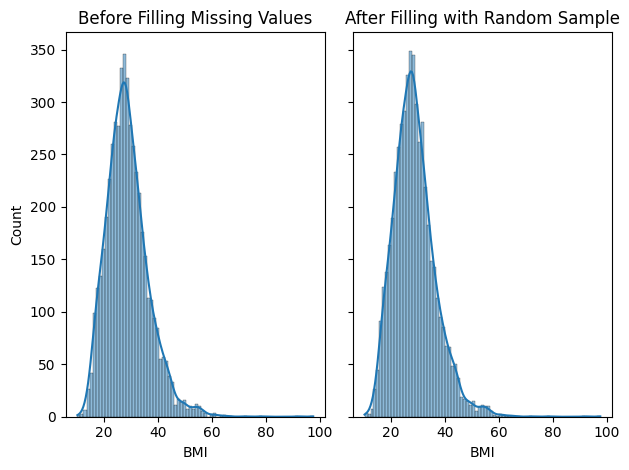

In [8]:
from sklearn.impute import KNNImputer

# Find missing values
missing_bmi = df["bmi"].isna()

# Sample random values from existing BMI (with replacement)
random_bmis = df.loc[~missing_bmi, "bmi"].sample(missing_bmi.sum(), replace=True, random_state=42)

df.loc[missing_bmi, "bmi"] = random_bmis.values

plt.figure(figsize=(12, 6))
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].set_title("Before Filling Missing Values")
sns.histplot(data=before, x="bmi", kde=True, ax=axs[0])
axs[0].set_xlabel("BMI")
axs[0].set_ylabel("Count")

axs[1].set_title("After Filling with Random Sample")
sns.histplot(data=df, x="bmi", kde=True, ax=axs[1])
axs[1].set_xlabel("BMI")
axs[1].set_ylabel("Count")

In [9]:
print(df.isnull().sum()) # Sudah aman gan

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [10]:
df = df.rename(columns={'Residence_type': 'residence_type'})
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,31.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
print(categorical_cols)

# jadiin category
print(df.columns)
for col in categorical_cols:
    df[col] = df[col].astype("category")

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [12]:
# Looking at unique values in categorical columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':", df[col].unique())


Unique values in 'gender': ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Unique values in 'ever_married': ['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Unique values in 'work_type': ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

Unique values in 'residence_type': ['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

Unique values in 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


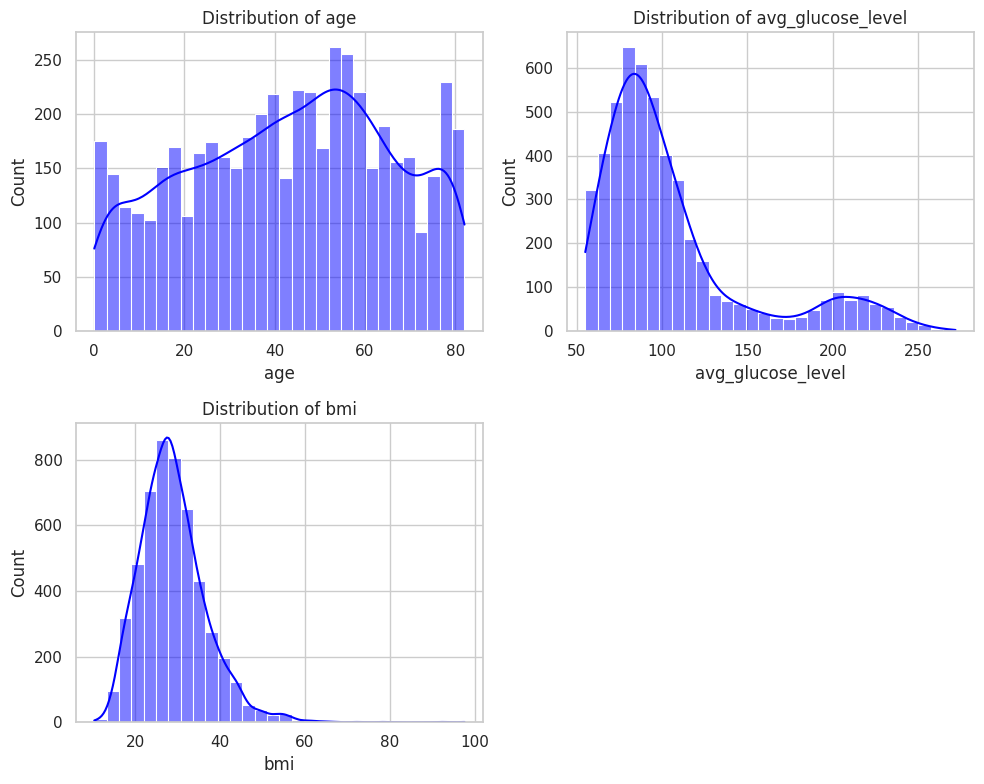

In [13]:
# Set style
sns.set(style="whitegrid")

numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Distribution of numerical columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

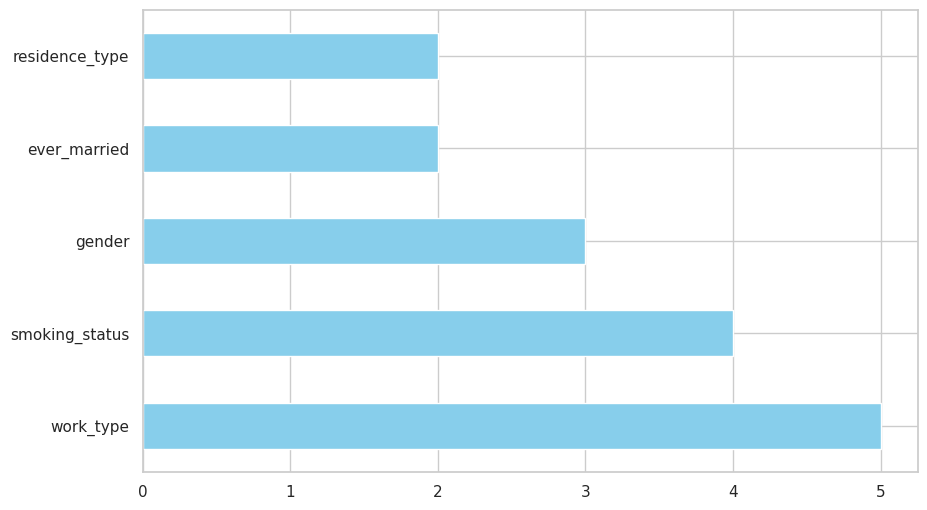

In [14]:
df.select_dtypes(["category"]).nunique().sort_values(ascending=False).plot(kind="barh", figsize=(10, 6), color="skyblue")

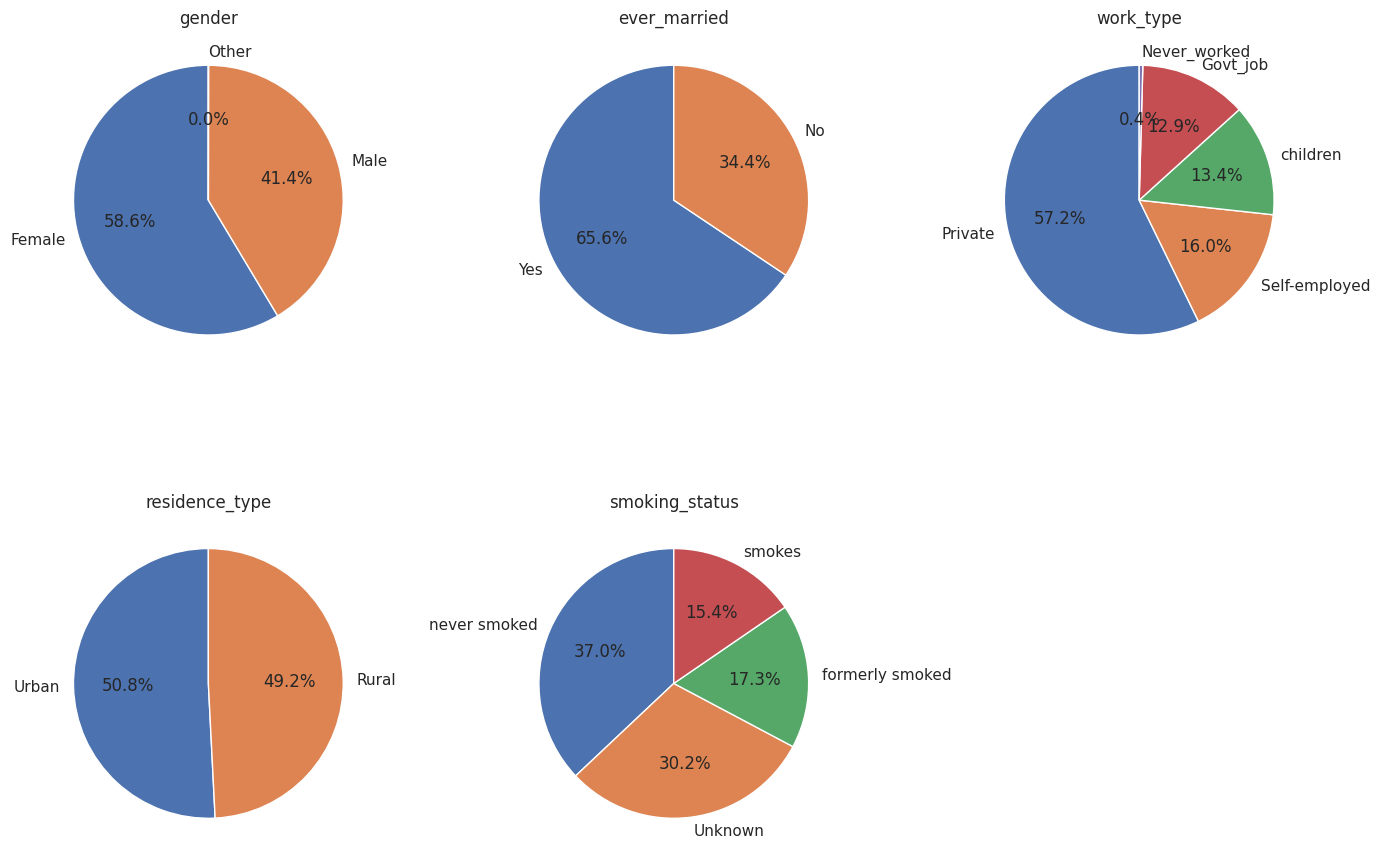

In [15]:
import matplotlib.pyplot as plt

categorical_columns = df.select_dtypes(["category"]).columns
n_cols = len(categorical_columns)
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
axs = axs.flatten()

# Loop dan plot setiap kolom kategori
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
    axs[i].set_title(col)
    axs[i].set_ylabel('')

if n_cols < 6:
    fig.delaxes(axs[5])

plt.tight_layout()
plt.show()

In [16]:
df.gender[df.gender == 'Other'] # Curiga ada kelamin other

3116    Other
Name: gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

/tmp/ipykernel_648429/4019959775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1', order=df[col].value_counts().index)
/tmp/ipykernel_648429/4019959775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1', order=df[col].value_counts().index)
/tmp/ipykernel_648429/4019959775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1', order=df[col].value_counts().index)
/tmp/ipykernel_648429/4019959775.py:6: FutureWarning: 

Passing `palette` without 

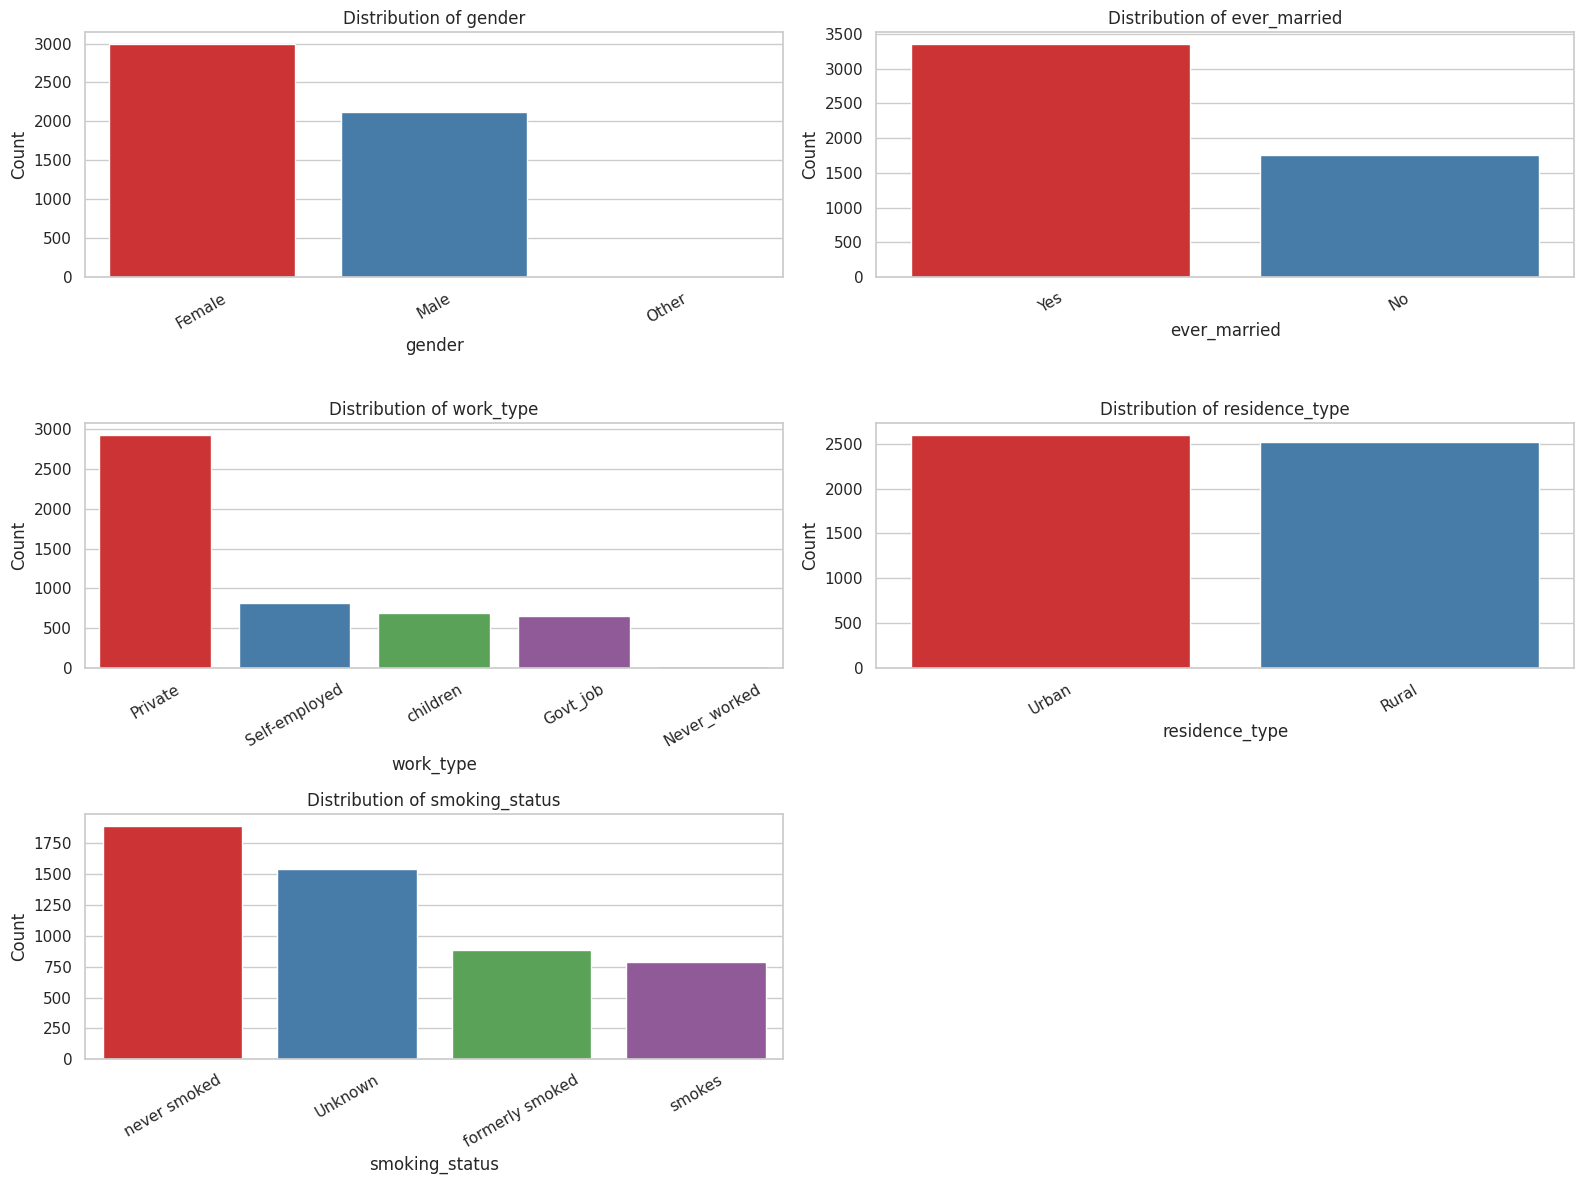

In [17]:
categorical_features = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, palette='Set1', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

/tmp/ipykernel_648429/1159077443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='stroke', y=col, palette='Set1')
/tmp/ipykernel_648429/1159077443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='stroke', y=col, palette='Set1')
/tmp/ipykernel_648429/1159077443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='stroke', y=col, palette='Set1')


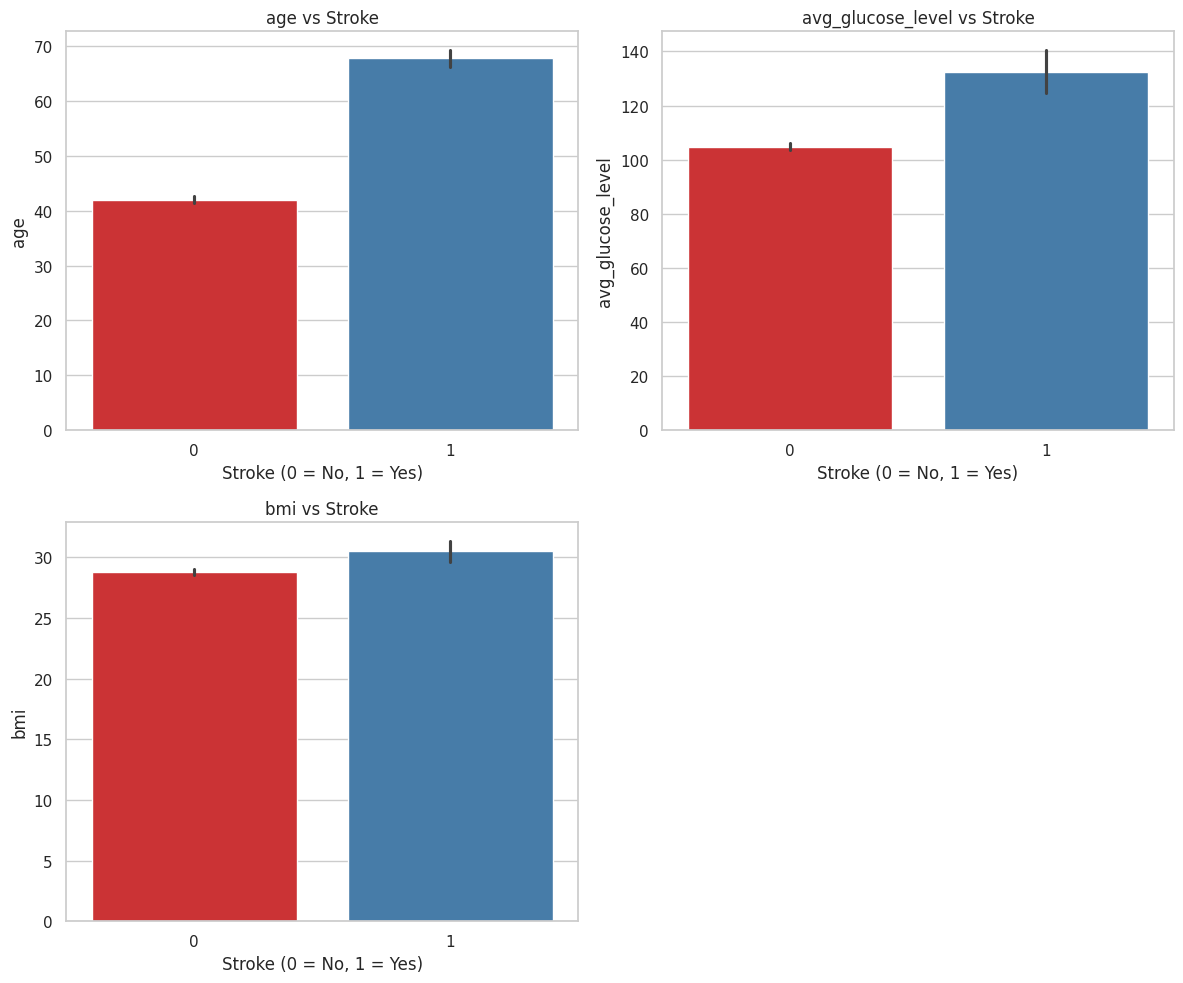

In [18]:
# Numerical features vs stroke
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=df, x='stroke', y=col, palette='Set1')
    plt.title(f'{col} vs Stroke')
    plt.xlabel('Stroke (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

/tmp/ipykernel_648429/3759511221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipykernel_648429/3759511221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipykernel_648429/3759511221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


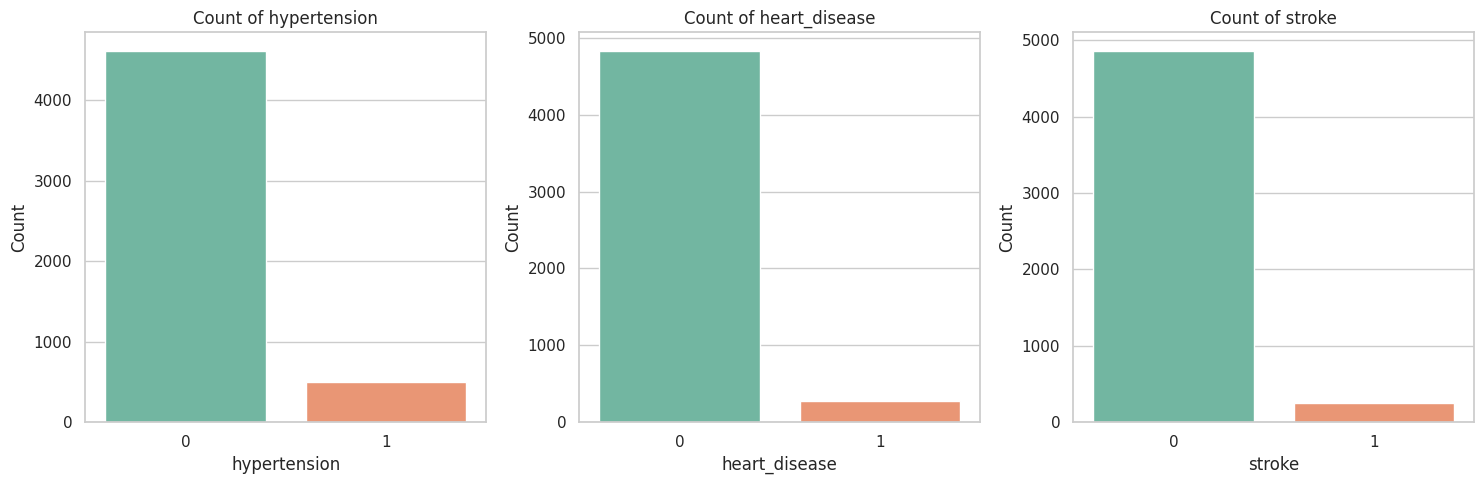

In [19]:
# Count plots for binary features
binary_features = ['hypertension', 'heart_disease', 'stroke']
plt.figure(figsize=(15, 5))
for i, col in enumerate(binary_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    

plt.tight_layout()
plt.show()

/tmp/ipykernel_648429/3334893573.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=stroke_rate, x=col, y='stroke', palette='Set1')
/tmp/ipykernel_648429/3334893573.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=stroke_rate, x=col, y='stroke', palette='Set1')


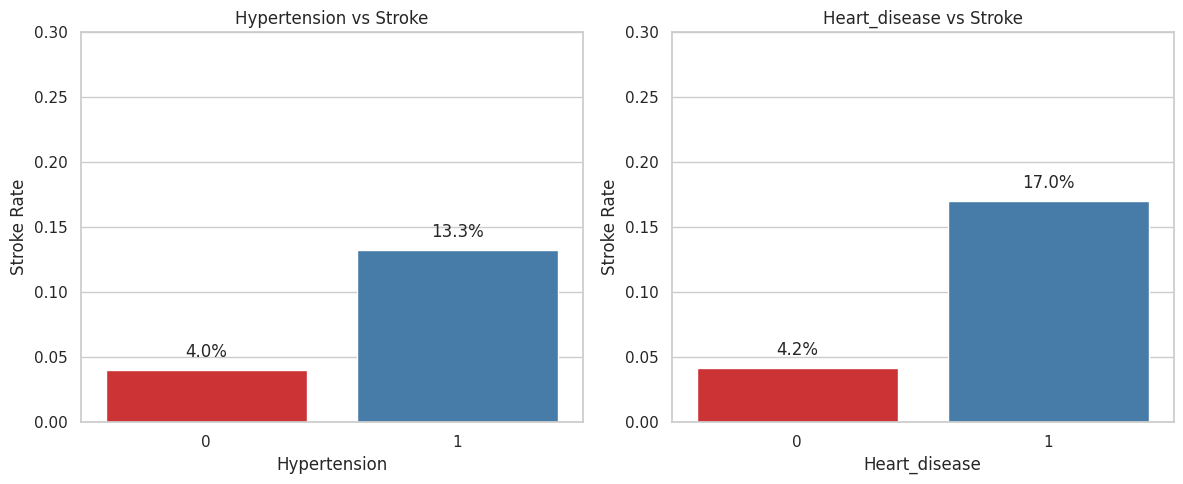

In [20]:
# Binary features vs stroke

# Assuming df already exists in the environment
binary_features = ['hypertension', 'heart_disease']

# Create bar plots of stroke proportion per binary category with percentages
plt.figure(figsize=(12, 5))
for i, col in enumerate(binary_features):
    plt.subplot(1, 2, i + 1)

    stroke_rate = df.groupby(col)['stroke'].mean().reset_index()
    ax = sns.barplot(data=stroke_rate, x=col, y='stroke', palette='Set1')
    plt.title(f'{col.capitalize()} vs Stroke')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col.capitalize())
    plt.ylim(0, 0.3)  # Scale for visibility

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
                f'{height * 100:.1f}%', ha="center")

plt.tight_layout()
plt.show()

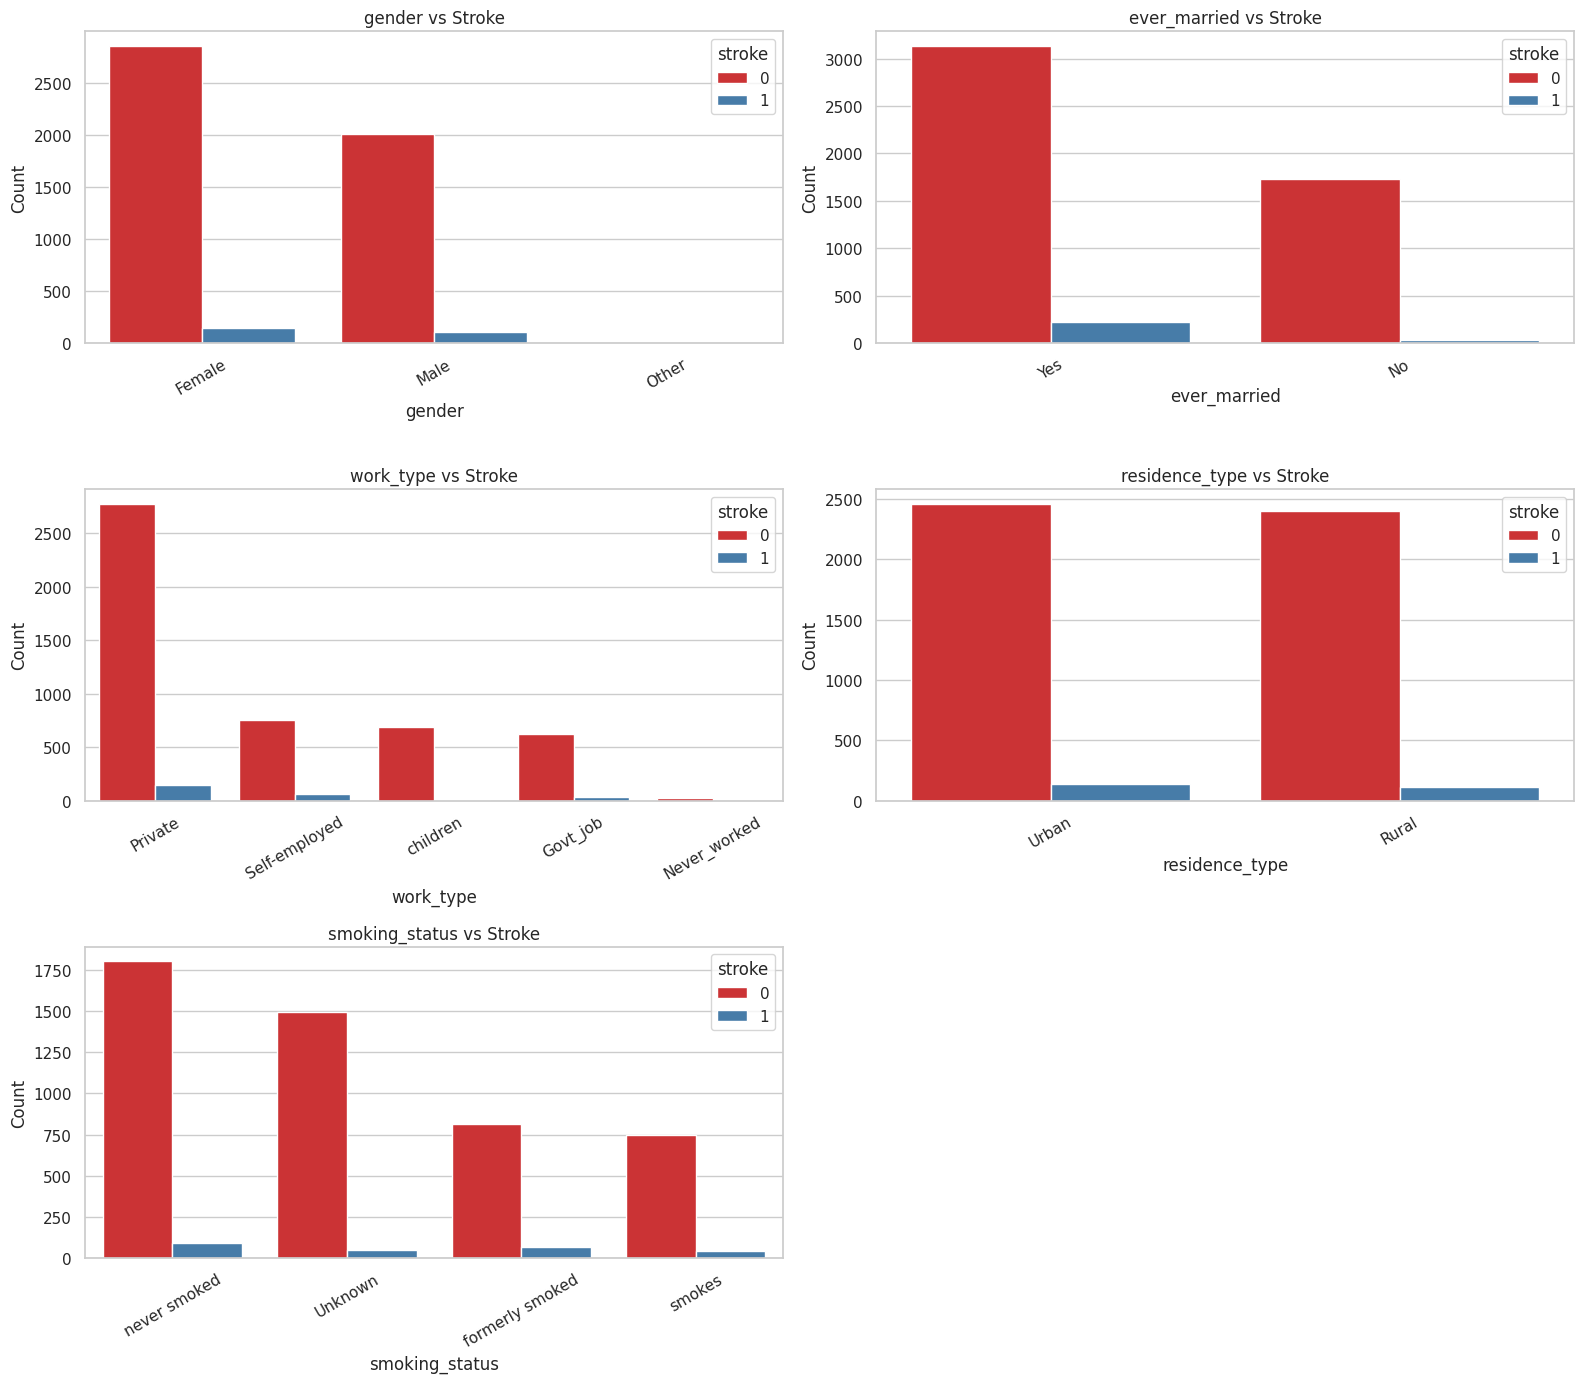

In [21]:
# Categorical features vs stroke
plt.figure(figsize=(16, 14))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, hue='stroke', palette='Set1', order=df[col].value_counts().index)
    plt.title(f'{col} vs Stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

/tmp/ipykernel_648429/532102262.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='work_type', hue='residence_type', y='stroke', ci=None, estimator=lambda x: sum(x)/len(x))


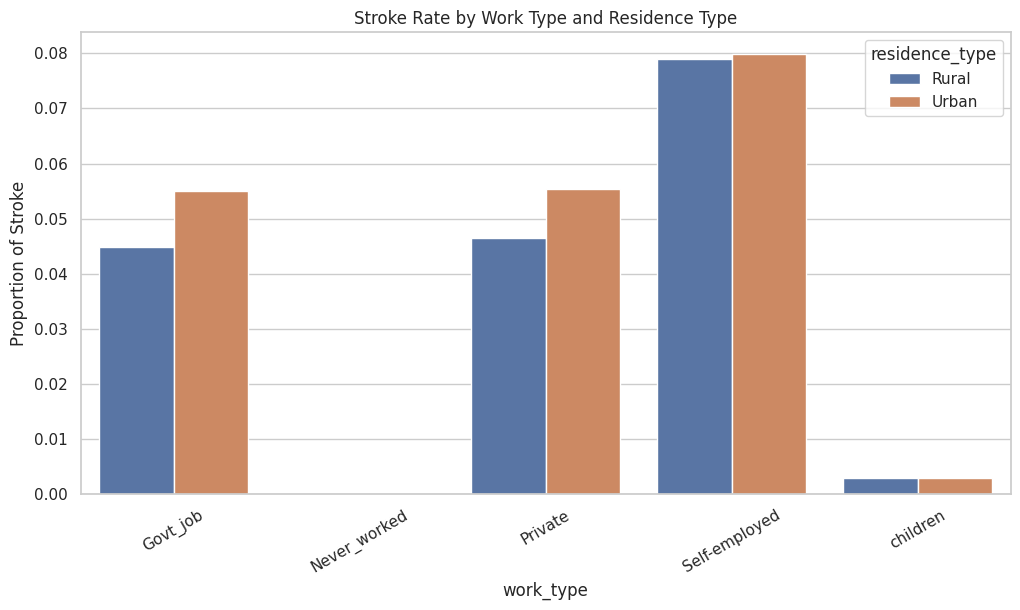

In [22]:
# Plot: Stroke rate by Work Type and Residence Type
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='work_type', hue='residence_type', y='stroke', ci=None, estimator=lambda x: sum(x)/len(x))
plt.title('Stroke Rate by Work Type and Residence Type')
plt.ylabel('Proportion of Stroke')
plt.xticks(rotation=30)
plt.show()

/tmp/ipykernel_648429/1525053264.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='smoking_status', hue='gender', y='stroke', ci=None, estimator=lambda x: sum(x)/len(x))


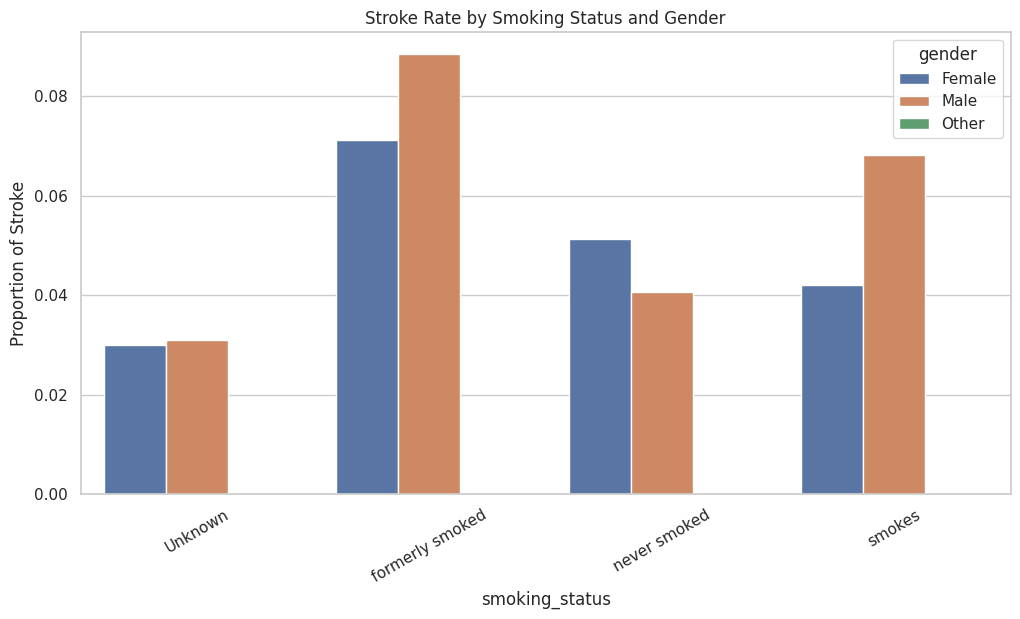

In [23]:
# Plot: Stroke rate by Smoking Status and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='smoking_status', hue='gender', y='stroke', ci=None, estimator=lambda x: sum(x)/len(x))
plt.title('Stroke Rate by Smoking Status and Gender')
plt.ylabel('Proportion of Stroke')
plt.xticks(rotation=30)
plt.show()

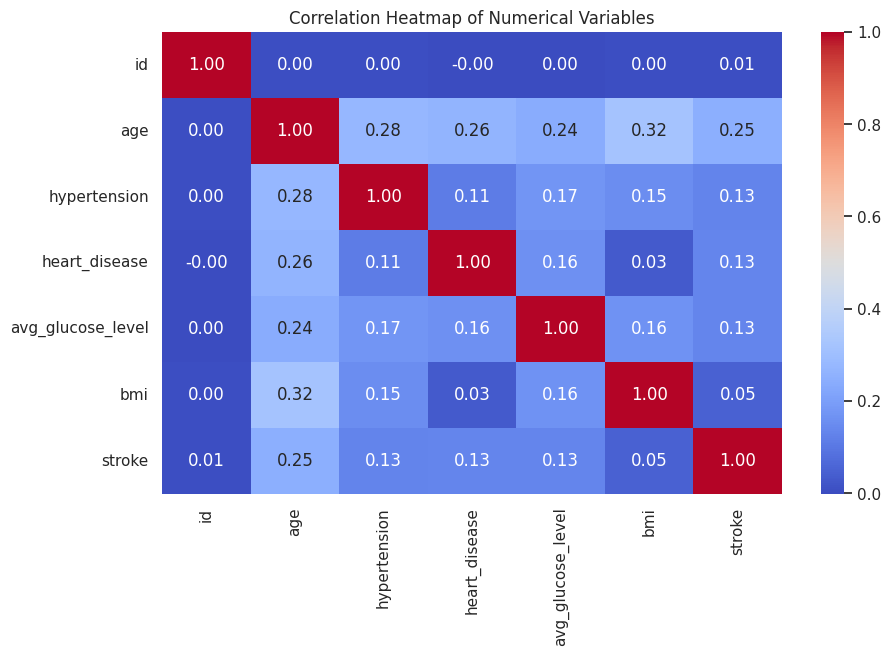

In [24]:
# Corelation 
corr_matrix = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [25]:
# Buat data encode baru untuk modeling 
df_encoded = df.copy()
df_encoded['age'] = df_encoded['age'].astype(str).str.strip().replace('81+', 81).astype(float)
# Manual binary encoding for applicable binary categorical variables
df_encoded['ever_married'] = df_encoded['ever_married'].map({'No': 0, 'Yes': 1})
df_encoded['residence_type'] = df_encoded['residence_type'].map({'Rural': 0, 'Urban': 1})
df_encoded['gender'] = df_encoded['gender'].map({'Male': 0, 'Female': 1})

# Drop any 'Other' genders if still present (not enough for modeling)
df_encoded = df_encoded[df_encoded['gender'].isin([0, 1])]

# One-hot encode multi-category variables
df_encoded = pd.get_dummies(df_encoded, columns=['work_type', 'smoking_status'], drop_first=True)

# Convert only boolean columns (from get_dummies) to 0/1
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Confirm fix
print(df_encoded.dtypes)
print(df_encoded.head())
df_encoded.to_csv("data/healthcare-dataset-stroke-data-encoded.csv", index=False)

id                                   int64
gender                             float64
age                                float64
hypertension                         int64
heart_disease                        int64
ever_married                      category
residence_type                    category
avg_glucose_level                  float64
bmi                                float64
stroke                               int64
work_type_Never_worked               int64
work_type_Private                    int64
work_type_Self-employed              int64
work_type_children                   int64
smoking_status_formerly smoked       int64
smoking_status_never smoked          int64
smoking_status_smokes                int64
dtype: object
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046     0.0  67.0             0              1            1   
1  51676     1.0  61.0             0              0            1   
2  31112     0.0  80.0             0              1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression(solver='liblinear', random_state=42,tol=0.001, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64


InvalidParameterError: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got -1 instead.

In [41]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report
)

class StrokeClassifier(nn.Module):
    def __init__(self, input_dim, hidden_layers=2, neurons=16):
        super(StrokeClassifier, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, neurons))
        layers.append(nn.ReLU())
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(neurons, neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(neurons, 1))
        layers.append(nn.Sigmoid())
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def train_and_evaluate(model, train_loader, X_test_tensor, y_test_tensor, epochs=20, lr=0.001, device='cpu'):
    model = model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training Loop
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        X_test_tensor = X_test_tensor.to(device)
        outputs = model(X_test_tensor)
        preds = (outputs >= 0.5).long().cpu().numpy()
        outputs_np = outputs.cpu().numpy()
        labels = y_test_tensor.cpu().numpy()

    y_test = labels.flatten()
    y_pred = preds.flatten()

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) # Akurasi dihitung
    auc = roc_auc_score(y_test, outputs_np)

    # Menampilkan hasil evaluasi
    print("\n===== Hasil Evaluasi Model =====")
    print(f"Accuracy: {accuracy:.4f}") # <-- BARIS YANG DITAMBAHKAN
    print(f"Skor AUC-ROC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))
    
    classification_report_df = classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"], output_dict=True)
    classification_report_df = pd.DataFrame(classification_report_df).transpose()

    return {
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'auc': auc,
        'classification_report': classification_report_df
    }

# Muat dan Pra-pemrosesan Data
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Konversi Data ke PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Buat DataLoader untuk Pelatihan
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Inisialisasi dan Jalankan Model
input_dim = X_train.shape[1]
model = StrokeClassifier(input_dim=input_dim, hidden_layers=2, neurons=32)

print("=== Memulai Pelatihan Model Neural Network ===")
metrics = train_and_evaluate(model, train_loader, X_test_tensor, y_test_tensor, epochs=25, lr=0.001)

=== Memulai Pelatihan Model Neural Network ===
Epoch [1/25], Loss: 0.5807
Epoch [2/25], Loss: 0.4382
Epoch [3/25], Loss: 0.4026
Epoch [4/25], Loss: 0.3873
Epoch [5/25], Loss: 0.3750
Epoch [6/25], Loss: 0.3647
Epoch [7/25], Loss: 0.3542
Epoch [8/25], Loss: 0.3452
Epoch [9/25], Loss: 0.3348
Epoch [10/25], Loss: 0.3250
Epoch [11/25], Loss: 0.3167
Epoch [12/25], Loss: 0.3037
Epoch [13/25], Loss: 0.2952
Epoch [14/25], Loss: 0.2857
Epoch [15/25], Loss: 0.2756
Epoch [16/25], Loss: 0.2673
Epoch [17/25], Loss: 0.2586
Epoch [18/25], Loss: 0.2517
Epoch [19/25], Loss: 0.2440
Epoch [20/25], Loss: 0.2403
Epoch [21/25], Loss: 0.2337
Epoch [22/25], Loss: 0.2283
Epoch [23/25], Loss: 0.2202
Epoch [24/25], Loss: 0.2145
Epoch [25/25], Loss: 0.2116

===== Hasil Evaluasi Model =====
Accuracy: 0.8405
Skor AUC-ROC: 0.7728

Confusion Matrix:
[[836 136]
 [ 27  23]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

   No Stroke       0.97      0.86      0.91       972
      Stroke     

In [48]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- Langkah 1: Muat dan Siapkan Data ---
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- Langkah 2: Pra-pemrosesan Data ---

# A. Hitung `scale_pos_weight` untuk menangani imbalance
# Dihitung dari data training SEBELUM resampling
count_no_stroke = y_train.value_counts()[0]
count_stroke = y_train.value_counts()[1]
scale_pos_weight_value = count_no_stroke / count_stroke
print(f"Nilai 'scale_pos_weight' yang akan digunakan: {scale_pos_weight_value:.2f}")

# B. Penskalaan Fitur (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# C. SMOTE tidak digunakan lagi pada pendekatan ini


# --- Langkah 3: Latih Model XGBoost dengan Parameter Baru ---

# Buat instance model XGBoost dengan bobot kelas
model_xgb_tuned = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value  # <-- PARAMETER KUNCI DITAMBAHKAN
)

# Latih model menggunakan data latih yang HANYA di-scaling
print("\n=== Memulai Pelatihan Model XGBoost yang Ditingkatkan ===")
model_xgb_tuned.fit(X_train_scaled, y_train) # Perhatikan kita menggunakan y_train asli
print("Pelatihan Selesai.")


# --- Langkah 4: Evaluasi Model ---

y_pred = model_xgb_tuned.predict(X_test_scaled)
y_pred_proba = model_xgb_tuned.predict_proba(X_test_scaled)[:, 1]

print("\n===== Hasil Evaluasi Model XGBoost yang Ditingkatkan =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

Nilai 'scale_pos_weight' yang akan digunakan: 19.54

=== Memulai Pelatihan Model XGBoost yang Ditingkatkan ===
Pelatihan Selesai.

===== Hasil Evaluasi Model XGBoost yang Ditingkatkan =====

Confusion Matrix:
[[932  40]
 [ 42   8]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.17      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022


Skor AUC-ROC: 0.7706


/home/martian/data-science/Data_science/env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:06:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- Langkah 1: Muat dan Siapkan Data ---
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Langkah 2: Pra-pemrosesan Data ---
# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- Langkah 3: Latih Model Random Forest ---
# Buat instance model RandomForestClassifier
# n_estimators adalah jumlah pohon dalam "hutan"
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Latih model menggunakan data latih yang sudah diproses
print("=== Memulai Pelatihan Model Random Forest ===")
model_rf.fit(X_train_resampled, y_train_resampled)
print("Pelatihan Selesai.")

# --- Langkah 4: Evaluasi Model ---
y_pred = model_rf.predict(X_test_scaled)
y_pred_proba = model_rf.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

=== Memulai Pelatihan Model Random Forest ===
Pelatihan Selesai.

===== Hasil Evaluasi Model Random Forest =====

Confusion Matrix:
[[939  33]
 [ 44   6]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.15      0.12      0.13        50

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.92      0.92      0.92      1022


Skor AUC-ROC: 0.7072
